In [47]:
import os
import pickle
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy as np
import obspy
from obspy.clients.fdsn.client import Client 
import obspy
import pandas as pd
import scipy.ndimage
import geopy.distance
import random
client = Client('IRIS')
import scipy
import seaborn as sn
from geopy.distance import geodesic

import matplotlib 
plt.rcParams.update({'font.size': 14})
from obspy import UTCDateTime

### Define Functions to grab detections and handle the file structure

In [58]:
# for [] lists
def reshape_flat_classifications(flat_list, record_size=6):
    return [flat_list[i:i+record_size] for i in range(0, len(flat_list), record_size)]
# for [[[]]] lists
def flatten_if_triple_nested(raw_data):
    if (
        isinstance(raw_data, list) and len(raw_data) > 0 and
        all(isinstance(block, list) and len(block) > 0 and isinstance(block[0], (list, tuple)) for block in raw_data)
    ):
        print("→ Detected triple-nested structure. Flattening one level.")
        return [record for block in raw_data for record in block]
    else:
        print("→ Structure is fine. No flattening needed.")
        return raw_data

def load_nested_classifications(station_codes, base_path='classifications'):
    classifications = {}
    for code in station_codes:
        file_path = os.path.join(base_path, f'{code}_raw.pickle')
        try:
            with open(file_path, 'rb') as handle:
                raw_data = pickle.load(handle)

                # Check for flat structure
                if isinstance(raw_data, list) and all(not isinstance(item, (list, tuple)) for item in raw_data):
                    print(f"→ Detected flat structure in {code}. Reshaping into records.")
                    corrected = reshape_flat_classifications(raw_data)
                else:
                    corrected = flatten_if_triple_nested(raw_data)

                classifications[code] = corrected
        except Exception as e:
            print(f"Error loading {code}: {e}")
            classifications[code] = []
    return classifications

# Plot frequency ratios using classifications & station codes
def plot_frequency_ratios(classifications, color_dict, bins=np.linspace(0, 2000, 50)):
    num_stations = len(classifications)
    rows = (num_stations + 1) // 2
    fig, ax = plt.subplots(rows, 2, figsize=(20, 10), sharex=True, sharey=True, tight_layout=True)

    for idx, (station, records) in enumerate(classifications.items()):
        row, col = divmod(idx, 2)

        # Flatten one more level if needed
        flat_records = [r for block in records for r in block] if isinstance(records[0], list) else records
        
        start_2013 = UTCDateTime("2014-01-01")
        end_2014 = UTCDateTime("2015-12-31")

        # Filter records to 2013–2014
        filtered_records = [
            r for r in flat_records
            if isinstance(r, (list, tuple))
            and len(r) > 0
            and isinstance(r[0], (list, tuple))
            and len(r[0]) == 2
            and isinstance(r[0][0], UTCDateTime)
            and start_2013 <= r[0][0] <= end_2014
]
        valid_ratios = [c[4] for c in filtered_records if isinstance(c, (list, tuple)) and len(c) > 4 and isinstance(c[4], (int, float))]

        ax[row, col].hist(valid_ratios, bins=bins, color=color_dict.get(station, 'gray'), edgecolor='k', linewidth=0.5)
        ax[row, col].axvline(100, color='k', linewidth=2)
        ax[row, col].set_title(station)
        ax[row, col].set_yscale('log')
        ax[row, col].set_xlim(0, 1000)

        
        if row == rows - 1:
            ax[row, col].set_xlabel('Frequency ratio (5–10 Hz / 10–15 Hz)')
        if col == 0:
            ax[row, col].set_ylabel('Count')

    fig.suptitle("Frequency Ratio Distributions across Stations (2014–2015)", fontsize=20)
    plt.show()


In [40]:
color1 = 'cornflowerblue'
color2 = 'navy'
color3 = 'lightgreen'
color4 = 'cyan'
color5 = 'forestgreen'
color6 = 'teal'
color7 = 'fuchsia'
color8 = 'cadetblue'
color9 = 'lightblue'
color10 = 'moccasin'
color11 = 'darkorange'
color12 = 'seagreen'
color13 = 'salmon'

→ Structure is fine. No flattening needed.
→ Structure is fine. No flattening needed.
→ Structure is fine. No flattening needed.
→ Structure is fine. No flattening needed.


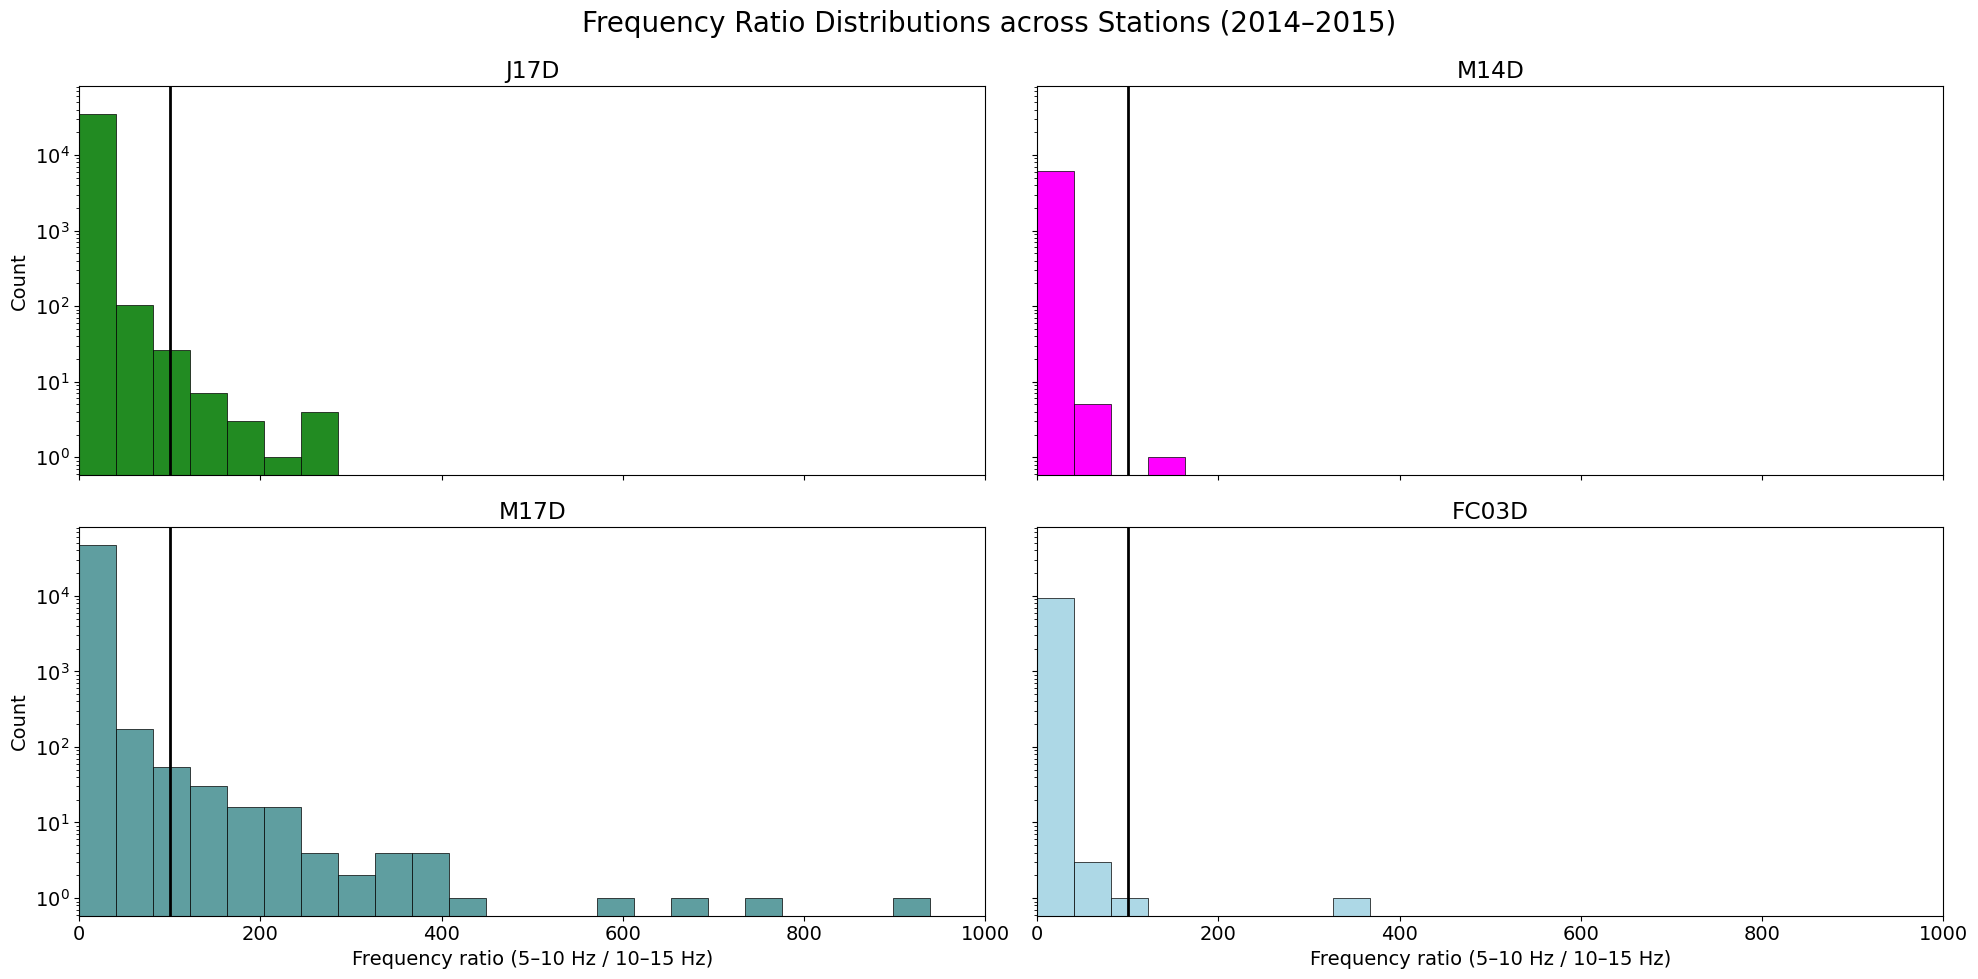

In [60]:
station_codes = ['J17D', 'M14D', 'M17D', 'FC03D'] # 'FN05C', 'FN19C', 'FN18C', 'J65C'] # 'M15D', 'M16D', 'G17D']
colors = {  'G34D': color1,
            'G26D': color2,
            'G18D': color3,
            'NC89': color4,
            'J17D': color5,
            'BACME': color6,
            'M14D': color7,
            'M17D': color8,
            'FC03D': color9,
            'FN14C': color10,
            'FN11C': color13,
            'FN10C': color12,
            'FN07C': color8,
            'FN04C': color1,
            'FN03C': color10,
            'FN05C': color11,
            'J65C': color12,
            'FN19C': color3,
            'FN18C': color12}

classifications = load_nested_classifications(station_codes)

plot_frequency_ratios(classifications, colors)
